In [9]:
# current date, for retrieving data from proper location.
year = "2023"
month = "May"
day = "25"

## Imports and initialization

In [10]:
from matplotlib import gridspec

In [11]:
import scipy.signal

In [12]:
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)

In [13]:
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [14]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao

In [15]:
import sys
sys.path.append("..")
from tools import *
from Analysis_Python_Files.fitters import LargeBeamMotExpansion
from tqdm import tqdm
from Analysis_Python_Files.fitters import lorentzian
from Analysis_Python_Files.fitters import exponential_decay, exponential_decay_zeroOffset, linear
from scipy import optimize
from scipy.interpolate import interp1d
%matplotlib inline
%config InlineBackend.figure_formats = ['png']
import importlib
CURRENT_VERSION = 1.01
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
# exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# from AnalysisHelpers import crop

from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao

## Fitting functions for temperature measurements

In [17]:
import scipy.constants as const


waist_twz = 700e-9
lambda_l= 850e-9 #m
# NA = 0.5
# waist_twz = 0.42*lambda_l/NA #m
U0_tweezer_inK = 1.0e-3# 400e-6 # approx 1.3 mK
U0_tweezer_inJ = U0_tweezer_inK*const.k
# omega_radial= (2* np.pi)  * 84e3
# omega_axial= (2* np.pi) * 21e3
omega_radial = np.sqrt(4*U0_tweezer_inJ/(mc.Rb87_M*waist_twz**2)) # in rad/s
omega_axial = omega_radial / (np.sqrt(2)*waist_twz*np.pi/lambda_l) # in rad/s

print("Trap depth in uK: ", abs(U0_tweezer_inK*1e6))
print("Trap raidal freq (kHz): ", abs(omega_radial/ (2*np.pi)/1e3))
print("Trap axial freq (kHz): ", abs(omega_axial/ (2*np.pi)/1e3))

Trap depth in uK:  1000.0
Trap raidal freq (kHz):  140.64890686235833
Trap axial freq (kHz):  38.44079637255929


### Monte-Carlo simulations: release-recapture

Following the procedure discussed in Tuchendler et al., 2008 Energy distribution and cooling of a single atom in an optical tweezer.

For the simulation, the initial position and velocity are chosen according to normal distributions with widths σr,v, and we consider that an atom is lost if its kinetic energy is higher than the trap potential at the atom position after the time of flight.

In [18]:
def delta_x_par (T, omega_par, mass= 87*const.u):
    return np.sqrt(const.k*T / (mass * omega_par**2) )

def delta_x_perp (T, omega_perp, mass= 87*const.u):
    return np.sqrt(const.k*T / (mass * omega_perp**2) )

def delta_v (T, mass= 87*const.u):
    return np.sqrt(const.k * T/ mass)

def get_initial_params(T, omega_par, omega_perp, num):
    # in here we assume that the z direction is the tweezer axis -> omega parallel
    (xi, yi)= np.random.normal(0, delta_x_perp(T, omega_perp), 2)
    zi= np.random.normal(0, delta_x_par(T, omega_par))
    (vxi, vyi, vzi) = np.random.normal(0, delta_v(T), 3)
    return (xi, yi, zi, vxi, vyi, vzi)

def get_final_params(dt, xi,yi,zi, vxi, vyi, vzi):
    g= 9.8 # m/s
    xf = xi + vxi*dt
    yf = yi + vyi*dt - (g * dt**2)/2
    zf = zi + vzi*dt
    vxf = vxi
    vyf = vyi - g*dt
    vzf = vzi

    return (xf, yf, zf, vxf, vyf, vzf )

def get_final_K_energy (xf, yf, zf, vxf, vyf, vzf, omega_par, omega_perp, mass = 87*const.u):
    return mass/2 * (vxf**2 + vyf**2 + vzf**2) + 1/2 * mass * ( (omega_par**2 * zf**2) + omega_perp**2 * (xf**2+ yf**2))


In [25]:
def get_initial_params(T, omega_par, omega_perp, num=1):
    # in here we assume that the z direction is the tweezer axis -> omega parallel
    (xi, yi)= np.random.normal(0, delta_x_perp(T, omega_perp), 2*num).reshape(num,2).T
    zi= np.random.normal(0, delta_x_par(T, omega_par))
    (vxi, vyi, vzi) = np.random.normal(0, delta_v(T), 3*num).reshape(num,3).T
    return (xi, yi, zi, vxi, vyi, vzi)

def get_final_params(dt, xi,yi,zi, vxi, vyi, vzi):
    g= 9.8 # m/s
    xf = xi + vxi*dt
    yf = yi + vyi*dt - (g * dt**2)/2
    zf = zi + vzi*dt
    vxf = vxi
    vyf = vyi - g*dt
    vzf = vzi
    return (xf, yf, zf, vxf, vyf, vzf )

def get_final_K_energy (xf, yf, zf, vxf, vyf, vzf, omega_par, omega_perp, mass = 87*const.u):
    return mass/2 * (vxf**2 + vyf**2 + vzf**2) + 1/2 * mass * ( (omega_par**2 * zf**2) + omega_perp**2 * (xf**2+ yf**2))

In [34]:
def get_survival_release_capture(dts, T, initial_survival, tweezer_depth, verbose = False):
    '''
    :params T: temperature of atoms in the trap in S.I unit
    :params tweezer_depth: trap depth in the unit of K. The trap frequency is generated accordingly assuming NA = 0.5
    '''
    lambda_l= 850e-9 #m
    # NA = 0.5
    waist_twz = 700e-9 #m
    U0_tweezer_inK = tweezer_depth
    U0_tweezer_inJ = U0_tweezer_inK*const.k
    omega_radial = np.sqrt(4*U0_tweezer_inJ/(mc.Rb87_M*waist_twz**2)) # in rad/s
    omega_axial = omega_radial / (np.sqrt(2)*waist_twz*np.pi/lambda_l) # in rad/s
    if (verbose):
        print("Trap depth in uK: ", abs(U0_tweezer_inK*1e6))
        print("Trap raidal freq (kHz): ", abs(omega_radial/ (2*np.pi)/1e3))
        print("Trap axial freq (kHz): ", abs(omega_axial/ (2*np.pi)/1e3))


    trajectories_per_time = 10000
    surv_dts = []
    for j in range(len(dts)):
        dt = dts[j]
        initial_params = get_initial_params(T, omega_par= omega_axial, omega_perp= omega_radial, num=trajectories_per_time)
        final_params = get_final_params(dt, *initial_params)
        final_K_energy = get_final_K_energy(*final_params, omega_par= omega_axial, omega_perp= omega_radial)
        surv = (final_K_energy<np.abs(U0_tweezer_inJ)).mean()
        surv_dts.append(surv)

    return np.array(surv_dts)*initial_survival

In [27]:
%lprun -f get_survival_release_capture get_survival_release_capture(np.linspace(0, 50e-6, 30), T=15e-6, tweezer_depth=1e-3)

UsageError: Line magic function `%lprun` not found.


Trap depth in uK:  1000.0
Trap raidal freq (kHz):  140.64890686235833
Trap axial freq (kHz):  38.44079637255929


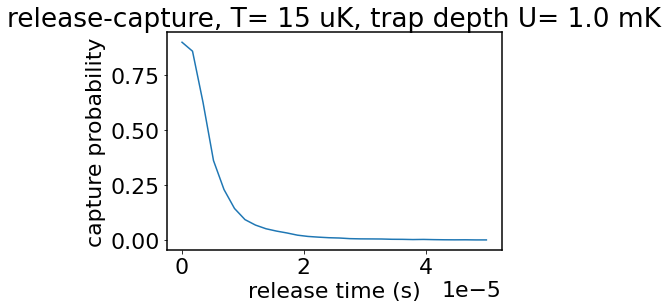

In [83]:
fig,ax = plt.subplots()
ax.plot(np.linspace(0, 50e-6, 30), get_survival_release_capture(np.linspace(0, 50e-6, 30), T=70e-6, initial_survival=.9, tweezer_depth=1e-3, verbose=True))
ax.set_ylabel ("capture probability")
ax.set_xlabel ("release time (s)")
ax.set_title("release-capture, T= "+str(15)+" uK, trap depth U= " + str(round(U0_tweezer_inK*1e3, 1))+" mK"  )
ax.grid()

In [38]:
# Used for the fitting:
def residual(T, x_pts, data, uncertainties, initial_survival, tweezer_depth):
    model = get_survival_release_capture(x_pts, T, initial_survival=initial_survival, tweezer_depth=tweezer_depth)
    return (((model-data)/uncertainties)**2).sum()


## fitting

In [39]:
from scipy.signal import savgol_filter
from scipy.optimize import fmin
from scipy.optimize import brentq

In [40]:
def get_smoothed_residual_f(x, residual):
    _sg = savgol_filter(residual, window_length=51, polyorder=3) # window size 51, polynomial order 3
    _f = interp1d(x, _sg, kind='cubic')
    return _f

In [41]:
def get_minimum(_f, x0):
    _xmin,_fmin, _,_,warnflag = fmin(_f, 
        x0, disp=False,full_output=True)
    if warnflag:
        print(f"{warnflag:d} ---  1 : Maximum number of function evaluations made. 2 : Maximum number of iterations reached.")
    return _xmin, _fmin

In [42]:
def get_root(_f, y0, xbound0, xbound1):
    _f_offset = lambda x : (_f(x) - y0)
    root = brentq(_f_offset, xbound0, xbound1, disp=False)
    return root
    # return get_minimum(_f=_f_offset, x0=x0)

# data 4, rnr after tweezer pgc (imaging)

In [43]:
data_idx = 4
datas, remote_data_folder, cached_data_folder = get_data_files(
    _year, _month, _day, ['data_{:d}'.format(data_idx)])
print(exp.getAnnotation(data_idx, data_address=cached_data_folder))
ee = exp.ExpFile(data_idx, cached_data_folder, expFile_version = CURRENT_VERSION)


NameError: name 'get_data_files' is not defined

In [83]:
andor_datas = ee.get_pics(image_num_per_rep=ee.pics_per_rep)

Variation First, data shape  (2, 8, 25, 150, 150)


## file info

In [84]:
ee.get_basic_info()
ee.print_master_script()

Number of Pictures: 400; Picture Dimensions: 150 x 150
Variations: 8;	Repetitions: 25;	Exp File Version: 1.01;
Experiment started at (H:M:S) 14:12:18: on (Y-M-D) 2023-4-15, And ended at 14:15:13: on 2023-4-15
Experiment Notes:  

 
--------------------------------------------
%%%%%%%%%%%%%%%%% Start With 1ms %%%%%%%%%%%%%%%%% 
t = 1
call CryoMOTLoadingPGC()

%%%%%%%%%%%%%%%  TOF  %%%%%%%%%%%%%%%%%%
off: SciMOTTrg
off: xyzMOTShutter
off: PrbShutter 
t += t_tof
pulseon: DO1_0 1

%%%%%%%%%%%%%%  PGC in Tweezer %%%%%%%%%%%%%%%%%%
% change the field/laser freq parameter here because the previous section is TOF and no light is on
call D2InTrapPGC(t_pgc_twz)
% note the t_pgc_twz should be smaller than 100
t += 100


%%%%%%%%%%%%%%  Image TWIZZER  %%%%%%%%%%%%%%%%%%
% change the field/laser freq parameter here because the previous section is dark, i.e. 100-t_pgc_twz is larger than 4
call PGCTweezerImaging()
%on: MOTFlashTrg
t += 5
call ReleaseRecapture(t_twz_release)
t += 5
%%%%%%%%%%%%%% Prep

In [85]:
ee.get_reps(), ee.get_key()[1].size, ee.key_name, ee.get_key()[1].shape


(25, 8, array(['t_twz_release'], dtype='<U13'), (8, 1))

In [86]:
ee.print_all_keys()


Name                     :     Value
bias_x                   :     -0.41
bias_y                   :      0.20
bias_z                   :      0.20
blowoff_amp_f2           :      0.00
d2_cooling_prb_resonance :   1226.00
d2_cooling_resonance     :   1206.00
d2_repump_prb_resonance  :   5262.00
d2_repump_resonance      :   5282.00
kick_cool_amp            :      0.35
kick_olcool              :     30.00
kick_olrepump            :     30.00
kick_repump_amp          :      3.00
mot_gradient             :     -7.00
mot_load_cool_amp        :      4.00
mot_load_cool_amp_cal    :      8.00
pgc_bias_x               :      2.40
pgc_bias_y               :     -0.50
pgc_bias_z               :     -0.10
pgc_cool_amp             :      4.50
pgc_flash_amp_cal        :      0.90
pgc_flash_dutycycle      :      1.00
pgc_flash_freq           :      0.01
pgc_flash_offtime        :    250.00
pgc_flash_ontime         :     15.00
pgc_img_bias_x           :      2.50
pgc_img_bias_y           :     -3.00
p

## tweezer statistics

In [87]:
%config InlineBackend.figure_formats = ['png']


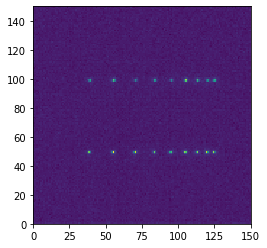

In [88]:
# maximaLocs = ah.findImageMaxima(
#     crop(pixi_data_avg, *cropped)[-1], neighborhood_size=10, threshold=20)
fig, ax = plt.subplots(figsize=[11, 4])
ax.pcolormesh(ah.softwareBinning(None, ee.pics[0, 0].mean(axis=0), avg=True))
ax.set_aspect('equal')


In [89]:
window = [25, 40, 120, 80]

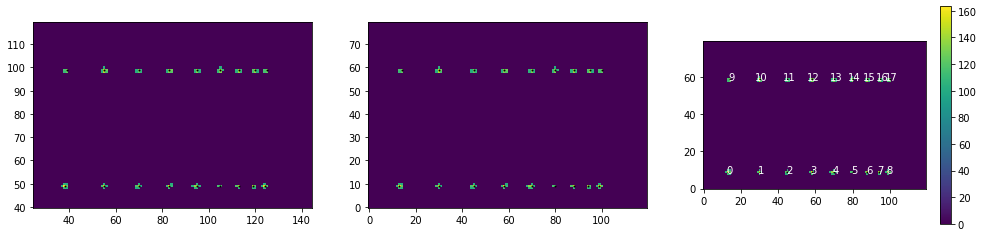

In [90]:
maximaLocs = ah.findAtomLocs(pic=ah.softwareBinning(None, andor_datas[0, 2].mean(axis=0)), n_cluster_row=2,
                             neighborhood_size=11, threshold=6.15, window=window, sort='MatchArray', debug_plot=True,
                             advanced_option = dict({"active":True, "image_threshold":102, "score_threshold":10}))

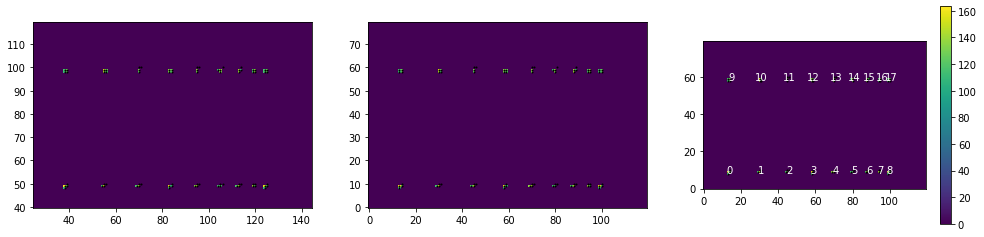

In [91]:
maximaLocs_MP = ah.findAtomLocs(pic=ah.softwareBinning(None, andor_datas[0, 2].mean(axis=0)),n_cluster_row=2,
                             neighborhood_size=20, threshold=0, window=window, sort='MatchArray', debug_plot=True, 
                             advanced_option = dict({"active":True, "image_threshold":110, "score_threshold":10}),
                             multi_points_option = dict({"active":True, "search_square":1, "num_points":4}))

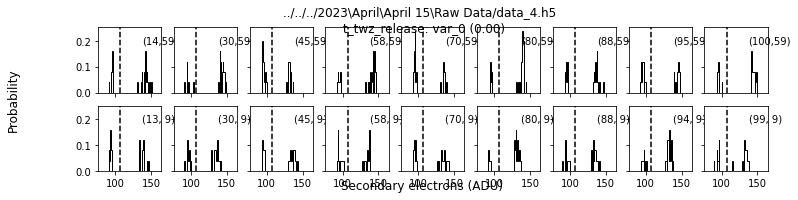

In [92]:
softBinParams = None
binnings = np.linspace(80, 160, 81)
fig, axes, res = mp.plotAtomArrayHistogram(data=ah.softwareBinning(softBinParams, andor_datas[0], avg=True), scan_idx=0, window=window,
                                           maximaLocs=maximaLocs_MP, gridShape=[2, 9], exp_file=ee,
                                           bins=binnings, debug=True, thresholds=107)
%config InlineBackend.figure_formats = ['png']
fig.set_size_inches([12, 12*0.22])


## use existing thresholding and atomLocs

In [93]:
_all_thresholds = 107
softBinParams = None
binnings = np.linspace(80, 160, 81)


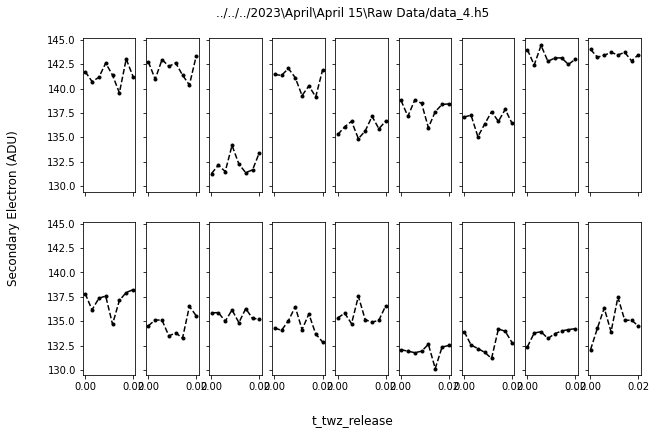

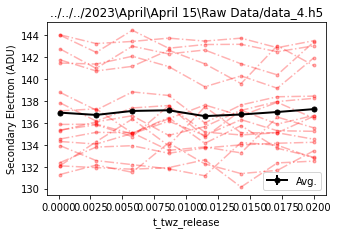

In [94]:
fig, ax, avg, _, _ = mp.plotAtomArrayAvgThroughVariations(data=ah.softwareBinning(softBinParams, andor_datas[0], avg=True),
                                                          maximaLocs=maximaLocs_MP, window=window, gridShape=[2,9], exp_file=ee,
                                                          thresholds=_all_thresholds, 
                                                          switch2DAxis=False, twoDPlotOpt='colormap',scanAxisOrder=None,plotDataIdx=0)
mp.set_matplotlib_formats('png')
# %matplotlib_inline.backend_inline.set_matplotlib_formats('png')
# fig.set_size_inches([15, 10.2])
# mp.GoldenRatio(fig)
fig, ax, avg, _, _ = mp.plotAtomArrayAvgThroughVariations(data=ah.softwareBinning(softBinParams, andor_datas[0], avg=True),
                                                          maximaLocs=maximaLocs_MP, window=window, gridShape=[2,9], exp_file=ee,
                                                          allInOne=True, thresholds=_all_thresholds, 
                                                          switch2DAxis=False, twoDPlotOpt='colormap',scanAxisOrder=None,plotDataIdx=0)


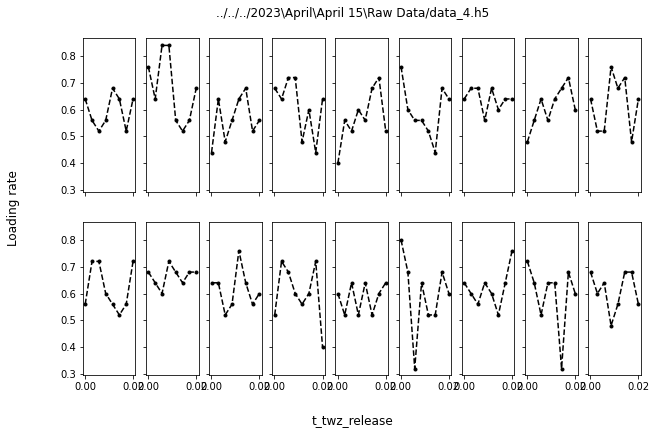

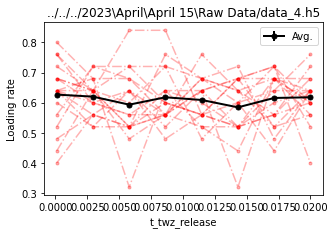

In [95]:
fig, axes, res = \
    mp.plotAtomArrayLoadingRateThroughVariations(data=ah.softwareBinning(softBinParams, andor_datas[0], avg=True), window=window,
                                                 maximaLocs=maximaLocs_MP, gridShape=[2, 9], exp_file=ee, bins=binnings,
                                                 thresholds=_all_thresholds, 
                                                 switch2DAxis=False, twoDPlotOpt='multiline',scanAxisOrder=None,plotDataIdx=0)
fig, axes, res = \
    mp.plotAtomArrayLoadingRateThroughVariations(data=ah.softwareBinning(softBinParams, andor_datas[0], avg=True), window=window,
                                                 maximaLocs=maximaLocs_MP, gridShape=[2, 9], exp_file=ee, bins=binnings,
                                                 thresholds=_all_thresholds, allInOne=True, 
                                                 switch2DAxis=False, twoDPlotOpt='multiline',scanAxisOrder=None,plotDataIdx=0)


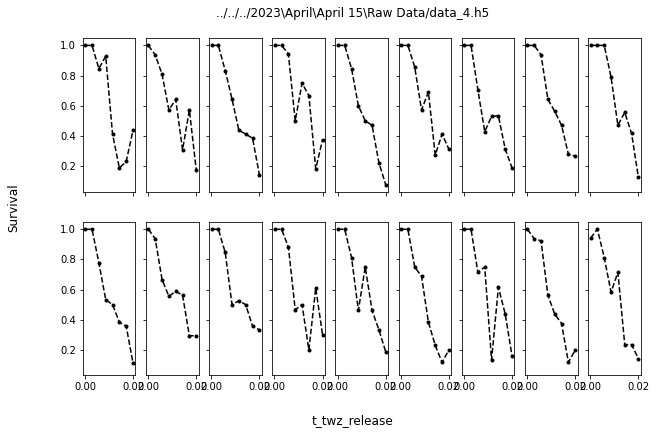

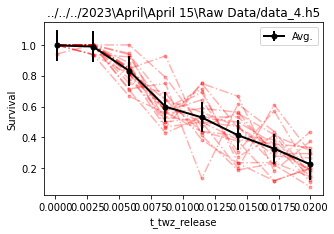

In [96]:
fig, axes, res = \
    mp.plotAtomArraySurvivalRateThroughVariations(data=ah.softwareBinning(softBinParams, andor_datas, avg=True), window=window,
                                                  maximaLocs=maximaLocs_MP, gridShape=[2, 9], exp_file=ee, bins=binnings,
                                                  thresholds=_all_thresholds, 
                                                  switch2DAxis=False, twoDPlotOpt='multiline',scanAxisOrder=None,plotDataIdx=0,
                                                  fit=None)
fig, axes, res0 = \
    mp.plotAtomArraySurvivalRateThroughVariations(data=ah.softwareBinning(softBinParams, andor_datas, avg=True), window=window,
                                                  maximaLocs=maximaLocs_MP, gridShape=[2, 9], exp_file=ee, bins=binnings,
                                                  thresholds=_all_thresholds, 
                                                  allInOne=True, switch2DAxis=True, twoDPlotOpt='multiline',scanAxisOrder=None,plotDataIdx=0,
                                                  fit=None)


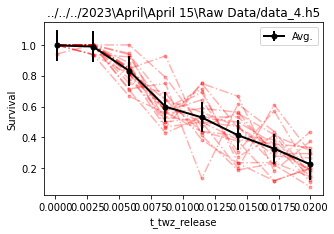

In [97]:
fig, axes, res0 = \
    mp.plotAtomArraySurvivalRateThroughVariations(
        data=ah.softwareBinning(softBinParams, andor_datas, avg=True), window=window,
        maximaLocs=maximaLocs_MP, gridShape=[2, 9], exp_file=ee, bins=binnings,
        thresholds=_all_thresholds, 
        allInOne=True, switch2DAxis=True, twoDPlotOpt='multiline',scanAxisOrder=[0,1],plotDataIdx=4,
        fit=None)

## fitting

In [73]:
ee.individual_keys_size

NameError: name 'ee' is not defined

In [21]:
fig, axes, res0 = \
    mp.plotAtomArraySurvivalRateThroughVariations(
        data=ah.softwareBinning(softBinParams, andor_datas, avg=True), window=window,
        maximaLocs=maximaLocs_MP, gridShape=[2, 9], exp_file=ee, bins=binnings,
        thresholds=_all_thresholds, 
        allInOne=True, switch2DAxis=False, twoDPlotOpt='multiline',scanAxisOrder=[1,0],plotDataIdx=1,
        fit=None)

AttributeError: module 'Analysis_Python_Files.MatplotlibPlotters' has no attribute 'plotAtomArraySurvivalRateThroughVariations'

In [20]:
_,plot_x,plot_c,_,_ = mp._generatePlotX(exp_file=ee, switch2DAxis=False, scanAxisOrder=[1,0])
x_axis = plot_x

res0_survival_allatoms = mp._reshapeForMultiDimensionResult(data=res0['survival'], exp_file=ee, switch2DAxis=False, scanAxisOrder=[1,0])
res0_survival = res0_survival_allatoms.mean(axis=0)
res0_survival_std = res0_survival_allatoms.std(axis=0)
res0_survival_std[res0_survival_std==0] = 1e-3

# y_traces = res0_survival
# uncertainties = res0_survival_std

y_traces = np.array([res0_survival])
uncertainties = np.array([res0_survival_std])
x_axis = np.array([x_axis])

AttributeError: module 'Analysis_Python_Files.MatplotlibPlotters' has no attribute '_generatePlotX'

In [19]:
y_traces[:,0]

NameError: name 'y_traces' is not defined

NameError: name 'x_axis' is not defined

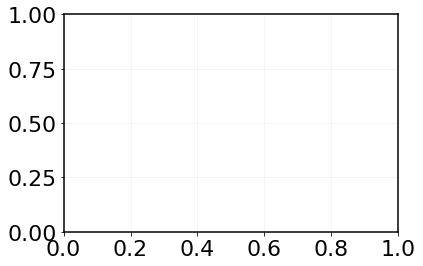

In [71]:
fig,ax = plt.subplots()
ax.plot(x_axis[0], y_traces[0,:], 'o', label = "data")
times= np.linspace(0, 21e-6, 40)
ax.plot(times*1e3, get_survival_release_capture(times, 55e-6, y_traces[0][0],1e-3))#, label= "sim "+str(round(popt[i]*1e6))+" uK")


In [103]:
#temps_guesses = [55e-6, 30e-6, 20e-6, 25e-6, 25e-6]
temps_guesses = [31e-6, 31e-6, 31e-6, 40e-6, 50e-6,50e-6,50e-6, 60e-6,60e-6,60e-6]   
init_surv = y_traces[:,0]
trap_depth = 1.06*1e-3
popt_scan = []
popt=[]
grid_loss = []
out_loss = []
grids = []
for idxi,(surv, surv_unc) in tqdm(enumerate(zip(y_traces, uncertainties))):
    rranges = (slice(temps_guesses[idxi]-30e-6, temps_guesses[idxi]+30.01e-6, 0.2e-6),)
    out, fout, grid, fgrid = optimize.brute(residual,rranges, 
        args=(x_axis[0]*1e-3, surv, surv_unc, init_surv[idxi], trap_depth), full_output=True, finish='leastsq')
    popt.append(out)
    grid_loss.append(fgrid)
    out_loss.append(fout)
    grids.append(grid)
popt_scan.append(popt)
# popt_scan = [np.array(popt_scan[0]).T[0]]

out_loss = np.array(out_loss)
grid_loss = np.array(grid_loss)
grids = np.array(grids)

1it [00:03,  3.98s/it]


In [104]:
low_err = []
high_err = []
loss_mins = []
popt_min = []
for gd, gl, p_init in tqdm(zip(grids, grid_loss, popt)):
    f_loss_smooth = get_smoothed_residual_f(gd, gl)
    grid_min, loss_min = get_minimum(f_loss_smooth, p_init)
    grid_min_err_low = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=gd.min(), xbound1=grid_min)
    grid_min_err_high = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid_min, xbound1=gd.max())
    low_err.append(grid_min[0]-grid_min_err_low) # those turns out to be array with only one element
    high_err.append(grid_min_err_high-grid_min[0])
    popt_min.append(grid_min[0])
    loss_mins.append(loss_min)
    # print(grid_min, grid_min_err_low, grid_min_err_high, loss_min)

1it [00:00, 333.33it/s]


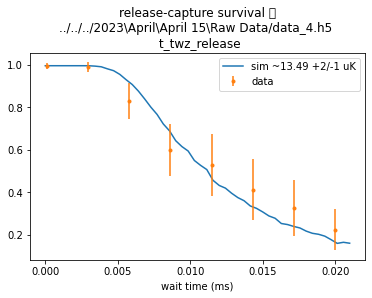

In [105]:
fig,ax = plt.subplots(1, figsize=[6,4])
ax = [ax]
for i in range(0,1):
    times= np.linspace(0, 21e-6, 50)
    ax[i].plot(times*1e3, get_survival_release_capture(times, 
            [popt_min][0][i], initial_survival=init_surv[i], tweezer_depth=trap_depth), 
            label= f"sim ~{[popt_min][0][i]*1e6:.2f} +{[high_err][0][i]*1e6:.0f}/-{[low_err][0][i]*1e6:.0f} uK")
    ax[i].errorbar(x_axis[0], y_traces[i], uncertainties[i],  fmt='.', label = "data")
    ax[i].legend()
    ax[i].set_xlabel("wait time (ms)")
ax[0].set_title("release-capture survival \r\n"+ ee.generatePlotTitle())
mp.GoldenRatio(fig)

## B232 data

In [46]:
atomlocs = [2, 2, 3, 3, 1]

In [47]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

sta: Organizing Transfer Data...
Number of Pictures: 600; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 11:36:22: on (Y-M-D) 2023-5-25, And ended at 11:39:30: on 2023-5-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...
no option???
no option???
no option???
no option???
no option???
no option???
sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting.........sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 1
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 1
sta: Handling Fitting...
Trap depth in uK:  1000.0
Trap raidal freq (kHz):  140.64890686235833
Trap axial freq (kHz):  38.44079637255929


<Figure size 7200x4800 with 0 Axes>

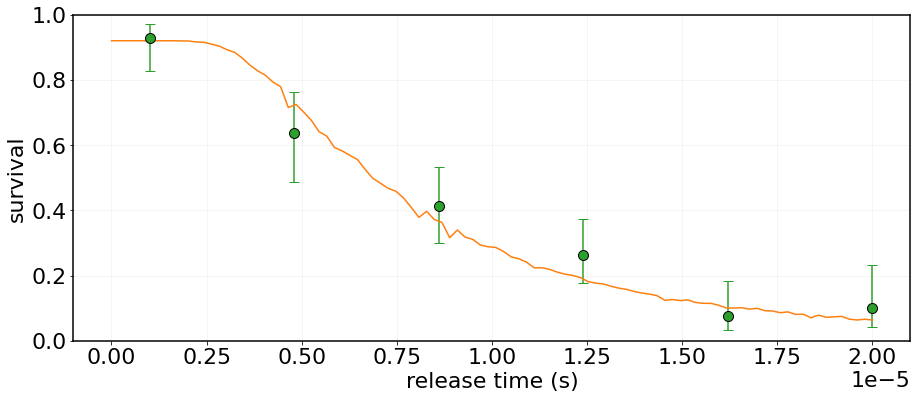

In [138]:
dataset1 = ta.standardTransferAnalysis(31, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 48)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6))
t = np.linspace(0, 20e-3, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='with LAC light')
# ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5)
# p = np.poly1d(np.polyfit(key1, avgTferData1, 2))
# ax.plot(t, p(t), '-',color=color1,label=' fit')

ax.plot(np.linspace(0, 20e-6, 100), get_survival_release_capture(np.linspace(0, 20e-6, 100), T=30e-6, initial_survival=.92, tweezer_depth=1e-3, verbose=True))
ax.grid(which='minor', alpha=.1)

# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
# plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
# plt.xlim(0,.02)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

In [163]:
import Analysis_Python_Files.MatplotlibPlotters as mp

sta: Organizing Transfer Data...
Number of Pictures: 800; Picture Dimensions: 5 x 24
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:10:2: on (Y-M-D) 2023-5-25, And ended at 14:13:16: on 2023-5-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...
sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting...........sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 7
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 7
sta: Handling Fitting...


AttributeError: module 'Analysis_Python_Files.MatplotlibPlotters' has no attribute 'get_survival_release_capture'

<Figure size 7200x4800 with 0 Axes>

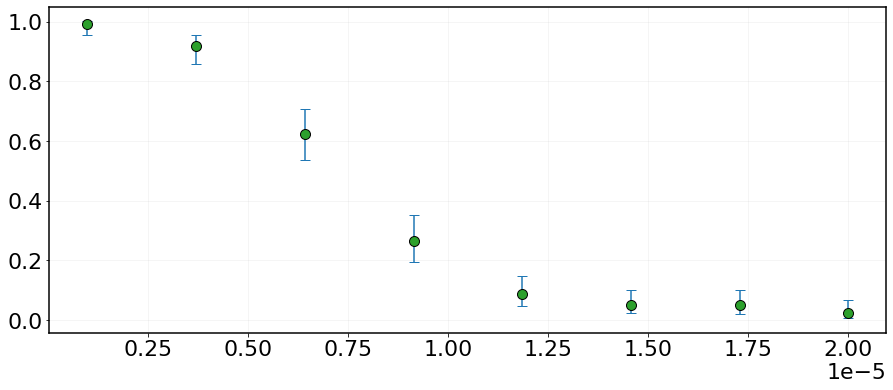

In [164]:
dataset1 = ta.standardTransferAnalysis(35, tao.getStandardSurvivalOptions([2,2,3,7,1]));
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6))
t = np.linspace(0, 20e-3, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5)
# p = np.poly1d(np.polyfit(key1, avgTferData1, 2))
# ax.plot(t, p(t), '-',color=color1,label=' fit')

ax.plot(np.linspace(0, 20e-6, 100), mp.get_survival_release_capture(np.linspace(0, 20e-6, 100), T=15e-6, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color='grey',label= '15 uK')
ax.plot(np.linspace(0, 20e-6, 100), mp.get_survival_release_capture(np.linspace(0, 20e-6, 100), T=30e-6, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= '35 uK')
ax.grid(which='minor', alpha=.1)

# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
# plt.xlim(0,.02)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

sta: Organizing Transfer Data...
Number of Pictures: 800; Picture Dimensions: 5 x 24
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:10:2: on (Y-M-D) 2023-5-25, And ended at 14:13:16: on 2023-5-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...
sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting...........sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 7
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 7
sta: Handling Fitting...
sta: Organizing Transfer Data...
Number of Pictures: 800; Picture Dimensions: 5 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting...........sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 7
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 7
sta: Handling Fitting...


<Figure size 7200x4800 with 0 Axes>

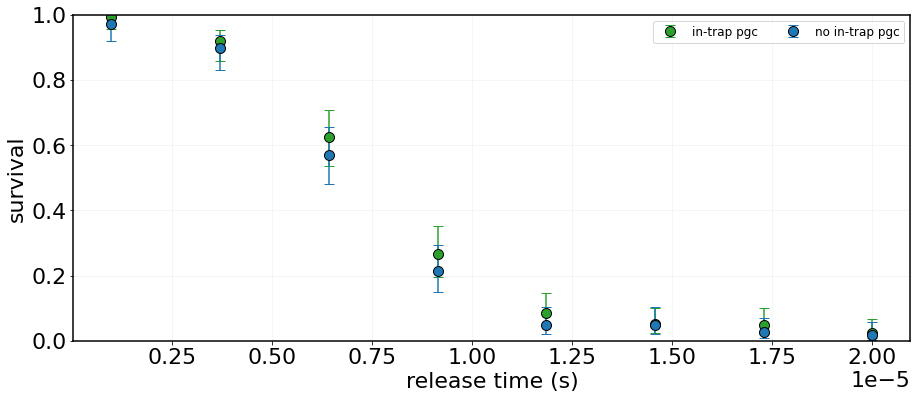

In [159]:
dataset1 = ta.standardTransferAnalysis(35, tao.getStandardSurvivalOptions([2,2,3,7,1]));
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]   


dataset2 = ta.standardTransferAnalysis(38, tao.getStandardSurvivalOptions([2,2,3,7,1]));
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2

color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6))
t = np.linspace(0, 20e-3, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label='in-trap pgc')
ax.errorbar(key1*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5,label='no in-trap pgc')
# p = np.poly1d(np.polyfit(key1, avgTferData1, 2))
# ax.plot(t, p(t), '-',color=color1,label=' fit')

# ax.plot(np.linspace(0, 20e-6, 100), get_survival_release_capture(np.linspace(0, 20e-6, 100), T=15e-6, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color='grey',label= '15 uK')
# ax.plot(np.linspace(0, 20e-6, 100), get_survival_release_capture(np.linspace(0, 20e-6, 100), T=30e-6, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= '35 uK')
ax.grid(which='minor', alpha=.1)

# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
# plt.xlim(0,.02)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5